# FRUIT SEGMENTATION AND DEFECT DETECTION

Images in folder “first task” show three apples with clear external defects:
- Outline the fruit by generating a binary mask
- Search for the defects on each fruit


In [1]:
from functions import *

#### Load the images

In [2]:
directory = 'fruit-inspection-images/first_task/'
img_color,img_gray = load_images(directory, [1,4],"RGB")

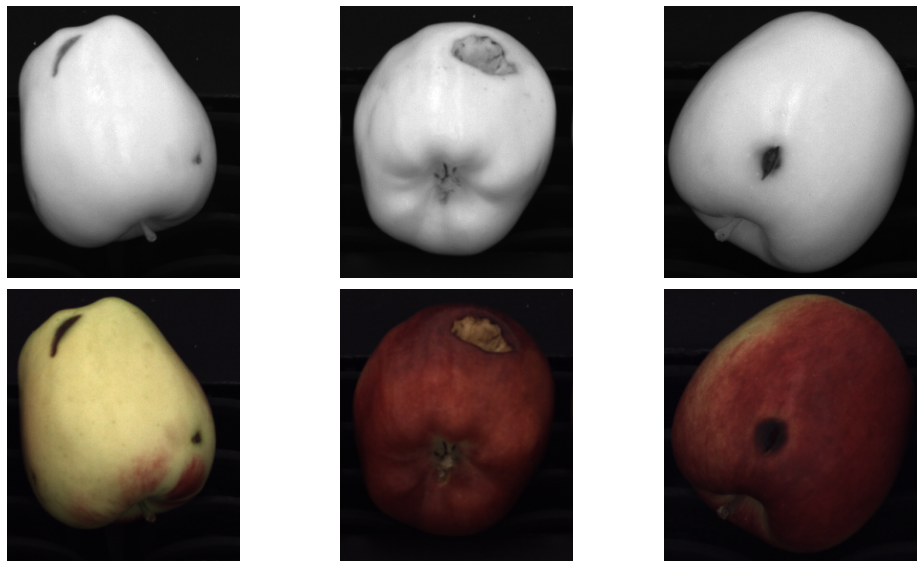

In [3]:
show_images(img_gray+ img_color,rows=2)


### Histogram of the Gray images
We want to analyze the distribution of the gray scale of each image

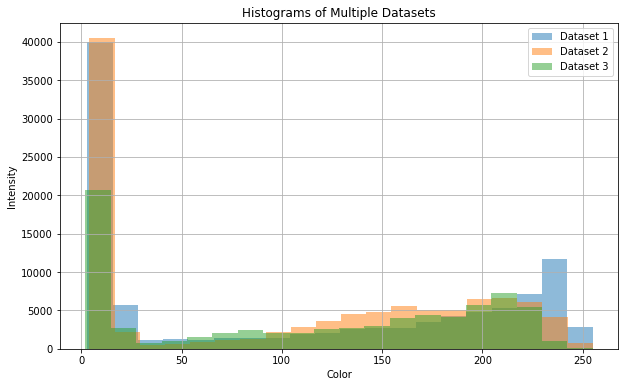

In [4]:
show_histograms(img_gray, bin_count=20)


The histograms of the images show that we can operate on the images without using any kind of operators. The distrigution is quite good to operate with the segmentation

### Fruit segmentation
Using a simple binary thresholding and Flood Fill to fill the holes in the apple 

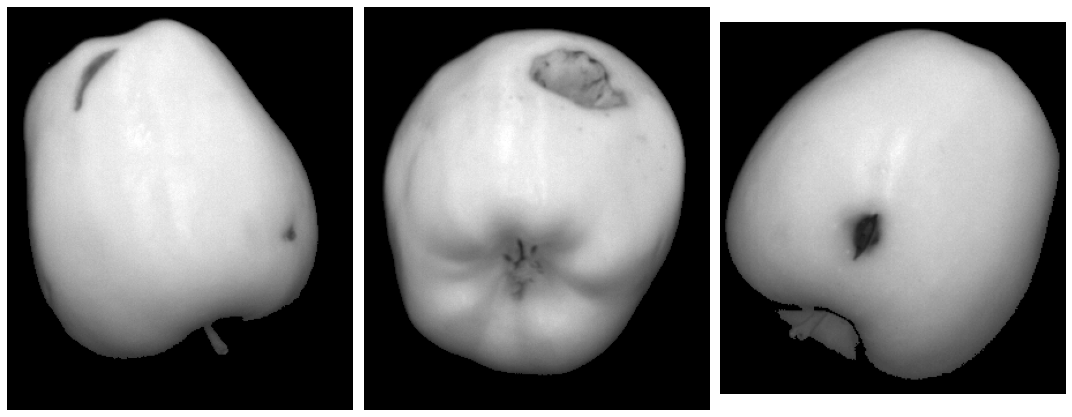

In [5]:
fruits_bw=[]
f=[]

for i in range(len(img_gray)):

    _, binary = cv2.threshold(img_gray[i], thresh_peaks(img_gray[i]), 255, cv2.THRESH_BINARY)
    fill =fill_back(flood_fill(binary))

    fruits_bw.append(cv2.bitwise_and(img_gray[i],img_gray[i],mask=fill))

show_images(fruits_bw,rows=1)


### Fruit inspection
In this phase the defetce are detected using the Canny's edge detector. The defects present strong edges so it is possible to find them

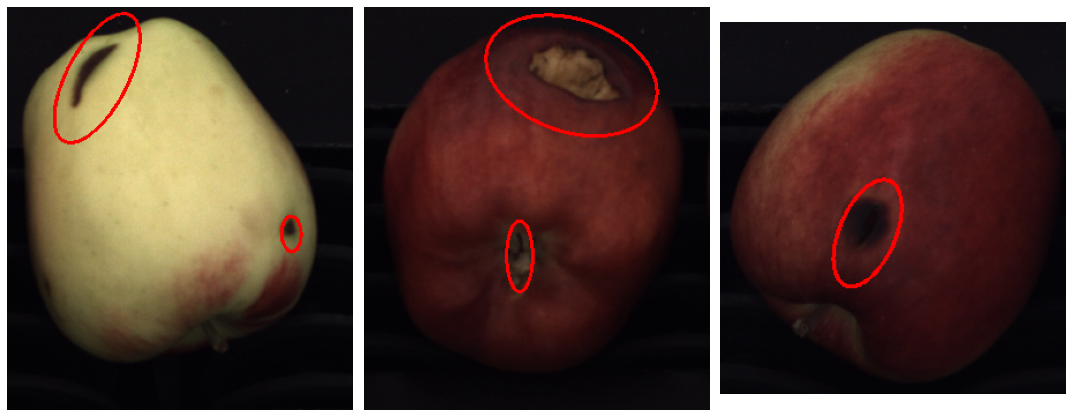

In [6]:
results=[]
for i in range(len(img_gray)):
    display, retval, labels,defect= get_defects(img_gray[i],fruits_bw[i], img_color[i])

    defects_counter = 0
    for j in range(1, retval):
        c = np.zeros_like(labels, dtype=np.uint8)
        c[labels == j] = 255
        defects_counter += draw_defects(display, c, 2, 2.2, 20, float("inf"))

    results.append(display)


show_images(results,rows=1)

### FRUIT_BLURRED

Smooth the images for a better segmentation and fruit inspection. We will use Bilateral filter to preserve the edges

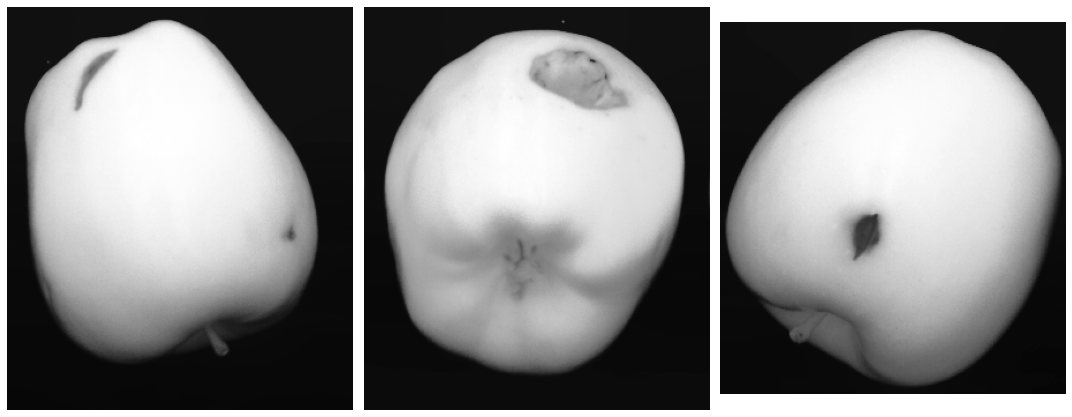

In [7]:
fruit_blurred=[]
for i in range(len(img_gray)):

    fruit_blurred.append(cv2.bilateralFilter(img_gray[i], 0, 25, 50))

show_images(fruit_blurred,rows=1)

Segmentation as before

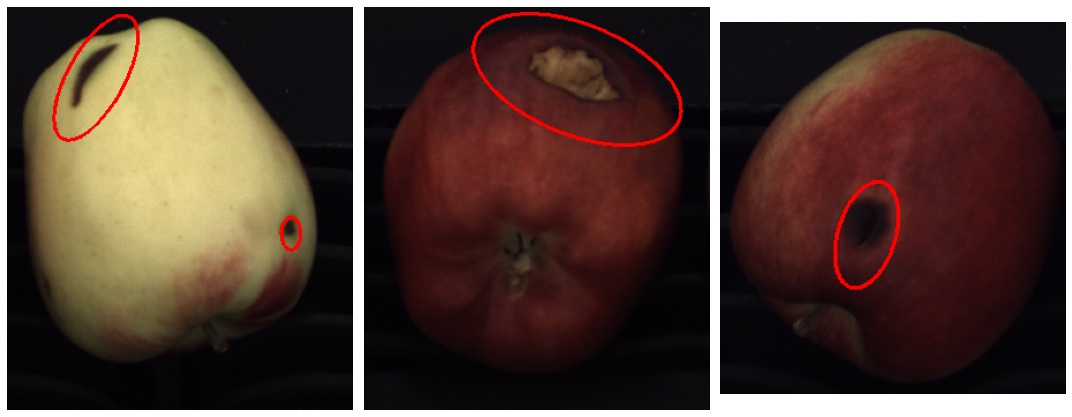

In [9]:
results=[]
edges=[]
for i in range(len(img_gray)):
    display, retval, labels,closed= get_defects(fruit_blurred[i],fruits_bw[i], img_color[i])

    defects_counter = 0
    for j in range(1, retval):
        c = np.zeros_like(labels, dtype=np.uint8)
        c[labels == j] = 255
        defects_counter += draw_defects(display, c, 2, 2.2, 20, float("inf"))

    results.append(display)


show_images(results,rows=1)